In [1]:
import numpy as np
from flann import FLANN
from datasets import *
import time
import matplotlib.pyplot as plt
from lshash import LSHashing

In [2]:
datasets_pathes = [ "mnist.hdf5", "sift.hdf5"]

In [3]:
def build_time_consumption(algo, X_train):
    t0 = time.time()
    try:
        tree = algo.fit(X_train, algorithm="kdtree")
    except:
        tree = algo.fit(X_train, hash_size=32, n_hashtables=12)
    total = time.time() - t0
    print(algo.name + " fitting time:" + str(total) + " seconds")
    return total

In [14]:
def predict_time_consumption(algo, X_test, n):
    results = []
    total_time = 0
    times = []
    for x in X_test:
        t0 = time.time()
        tmp = algo.predict(x, n)
        t_tmp = (time.time() - t0)
        total_time += t_tmp
        times.append(t_tmp)
        
    average_time =  total_time / len(X_test)
    print(algo.name + " total time:" + str(total_time) + " seconds")
    print(algo.name + " average time:" + str(average_time) + " seconds")
    plt.title("Distribution of execution time")
    plt.hist(times, bins = 5, range=(min(times),max(times)), log=True, label=algo.name)
    plt.xlabel("Time (sec)")
    plt.ylabel("Number of executions")
    plt.legend()
    plt.show()
    return total_time, average_time, times

In [15]:
def time_metrics(algo, X_train, X_test, n):
    build_time = build_time_consumption(algo, X_train)
    total_predict_time, average_predict_time, times = predict_time_consumption(algo, X_test, n)
    return (build_time, total_predict_time, average_predict_time, times)

In [16]:
def accuracy(algo, X_test, neighbors, n):
    results = [ algo.predict(x,n) for x in X_test]
    acc = 0.0
    for idx, res in enumerate(results):
        if res in neighbors[idx]:
            acc += 1.0
    acc /= len(X_test)
    print("Accuracy: " + str(acc))
    return acc

In [17]:
def analyse_algo(algo, dataset_fp, n):
    X_train, X_test, neighbors = get_dataset(dataset_fp)
    times = time_metrics(algo, X_train, X_test, n=1)
    acc = accuracy(algo, X_test, neighbors, n)
    return times, acc

Dataset mnist.hdf5
FLANN fitting time:1.0130577087402344 seconds
FLANN total time:1.1787545680999756 seconds
FLANN average time:0.00011787545680999756 seconds


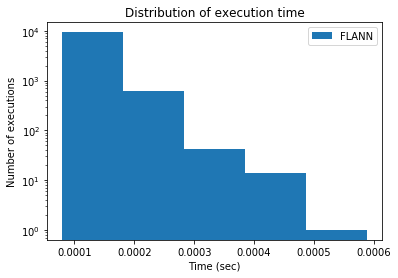

Accuracy: 0.9977
-------------------------------------------------------
Dataset sift.hdf5
FLANN fitting time:4.458935022354126 seconds
FLANN total time:1.2911133766174316 seconds
FLANN average time:0.00012911133766174316 seconds


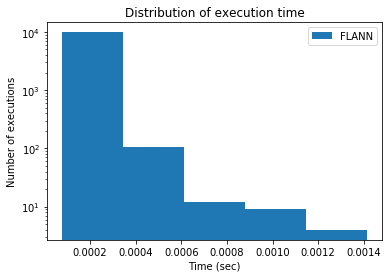

Accuracy: 0.9486
-------------------------------------------------------


In [18]:
flann_times = []
flann_acc = []
for d in datasets_pathes:
    print("Dataset " + d)
    times, acc = analyse_algo(FLANN(), d, 1)
    flann_times.append(times)
    flann_acc.append(acc)
    print("-------------------------------------------------------")

Dataset mnist.hdf5
LSHashing fitting time:68.54245591163635 seconds
LSHashing total time:26.919742584228516 seconds
LSHashing average time:0.0026919742584228515 seconds


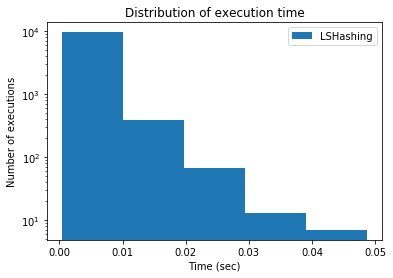

/home/gr/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


Accuracy: 0.6619
-------------------------------------------------------
Dataset sift.hdf5
LSHashing fitting time:256.0945198535919 seconds
LSHashing total time:74.28972697257996 seconds
LSHashing average time:0.007428972697257996 seconds


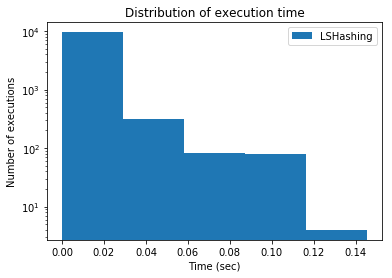

Accuracy: 0.8976
-------------------------------------------------------


In [19]:
lsh_times = []
lsh_acc = []
for d in datasets_pathes:
    print("Dataset " + d)
    times, acc = analyse_algo(LSHashing(), d, 1)
    lsh_times.append(times)
    lsh_acc.append(acc)
    print("-------------------------------------------------------")